# Applying various classifiers on HR Analytics Data

In [1]:
## Importing all the required python libraries

import numpy as np
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [3]:
df_processed = pd.read_csv('Downloads/hr_data_processed.csv')

In [4]:
df_processed.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.021105,-0.099436,0.058697,-0.388375,0.025605,0.006373,0.006615,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.341303,0.128964,-0.007104,0.006567,-0.008684,0.001269,-0.005471,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.421762,0.193962,-0.004741,0.023787,-0.006064,0.003287,0.009703,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
average_montly_hours,-0.021105,0.341303,0.421762,1.000000,0.126068,-0.009533,0.070982,-0.003404,0.009331,-0.000428,...,-0.010986,-0.001681,-0.008904,-0.006670,-0.001901,-0.003137,0.014770,-0.009357,-0.000974,0.006183
time_spend_company,-0.099436,0.128964,0.193962,0.126068,1.000000,0.002219,0.140995,0.067437,-0.004724,-0.021817,...,-0.021951,0.112778,0.010930,-0.004099,0.015901,-0.031018,-0.026631,0.039199,-0.040200,0.018809
work_accident,0.058697,-0.007104,-0.004741,-0.009533,0.002219,1.000000,-0.154622,0.039245,-0.009293,0.017167,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.070982,0.140995,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003404,0.067437,0.039245,-0.061788,1.000000,-0.038942,0.021268,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
department_IT,0.006373,0.001269,0.003287,0.009331,-0.004724,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
department_RandD,0.006615,-0.005471,0.009703,-0.000428,-0.021817,0.017167,-0.046596,0.021268,-0.070240,1.000000,...,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


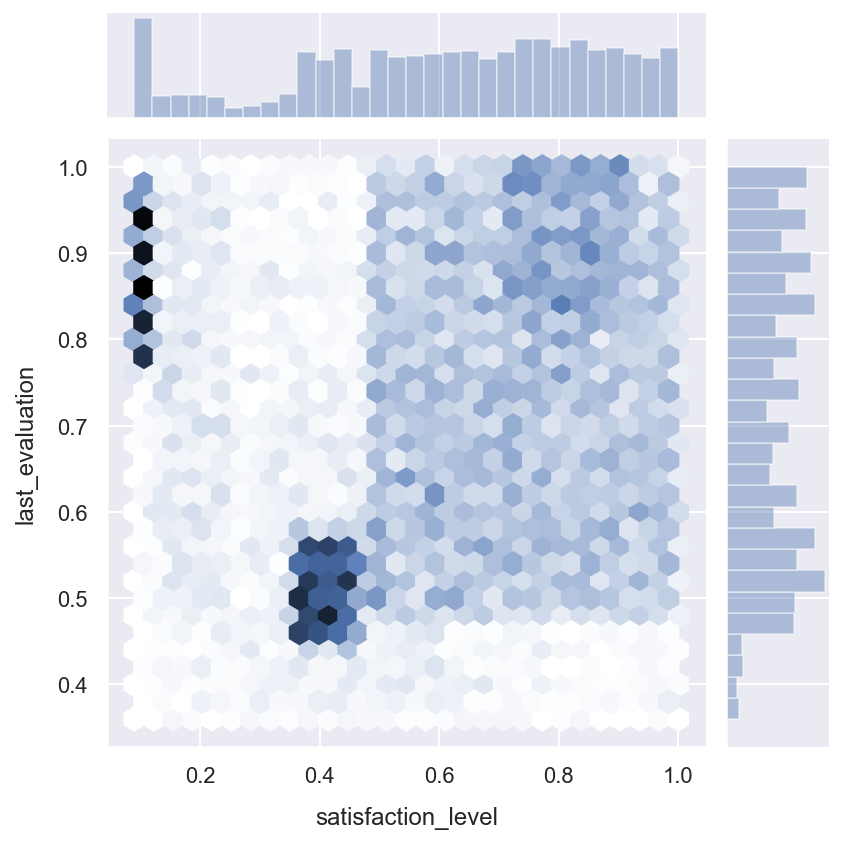

In [5]:
# We'll use satisfaction_level and last_evaluation valuation to train our model

sns.jointplot(x='satisfaction_level',y='last_evaluation',data=df_processed,kind='hex')
plt.show()

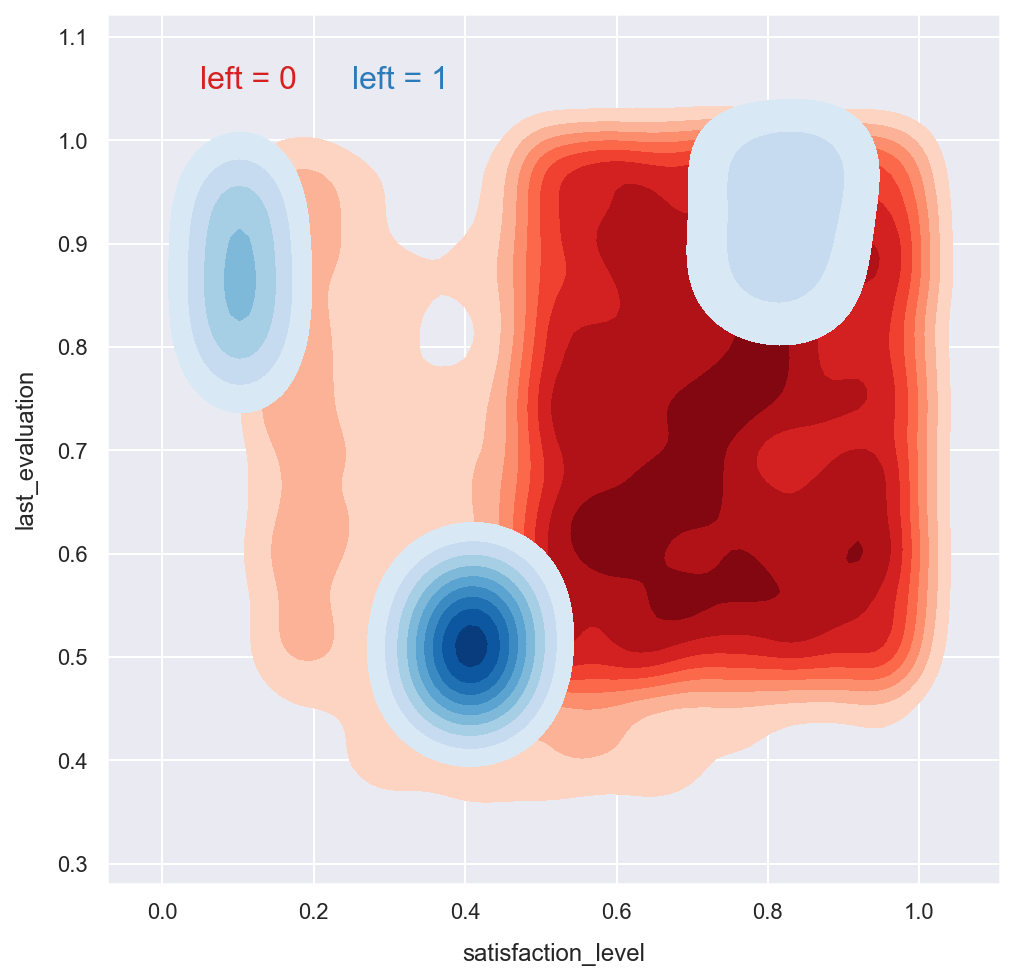

In [6]:
# Segementing by the target variable (left)

fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)

for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(df_processed.loc[df_processed.left==i, 'satisfaction_level'],df_processed.loc[df_processed.left==i, 'last_evaluation'],cmap=c,**plot_args)

ax.text(0.05, 1.05, 'left = 0',size=16,color=sns.color_palette('Reds')[-2])

ax.text(0.25, 1.05, 'left = 1',size=16, color=sns.color_palette('Blues')[-2])
plt.show()

In [7]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(df_processed[features].values,df_processed['left'].values,test_size=0.3,random_state=1)

In [8]:
# Scaling the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
# Creating a new dataframe to store model scores

df_score = pd.DataFrame(columns =['Model Name','Overall Accuracy Score','Left_0 Score','Left_1 Score'])

# Creating a function to print accuracy scores & confusion matrix and plot decision regions.
# The function will also append the scores of the model to a new dataframe for a comparison.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit_and_assemble_score(test_name,clf, X_test, y_test):
    
    # Calculating test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    
    # Calculating accuracy per class
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    plt.title(test_name)
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')
    
    # Append accuracy scores to a dataframe
    df_score.loc[len(df_score.index)] = [test_name,round(acc,2),scores[0],scores[1]]
    return(df_score)

### Linear Support Vector Machine (SVM)

,Model Name,Overall Accuracy Score,Left_0 Score,Left_1 Score
0,Linear_SVM,75.91,100.0,0.0


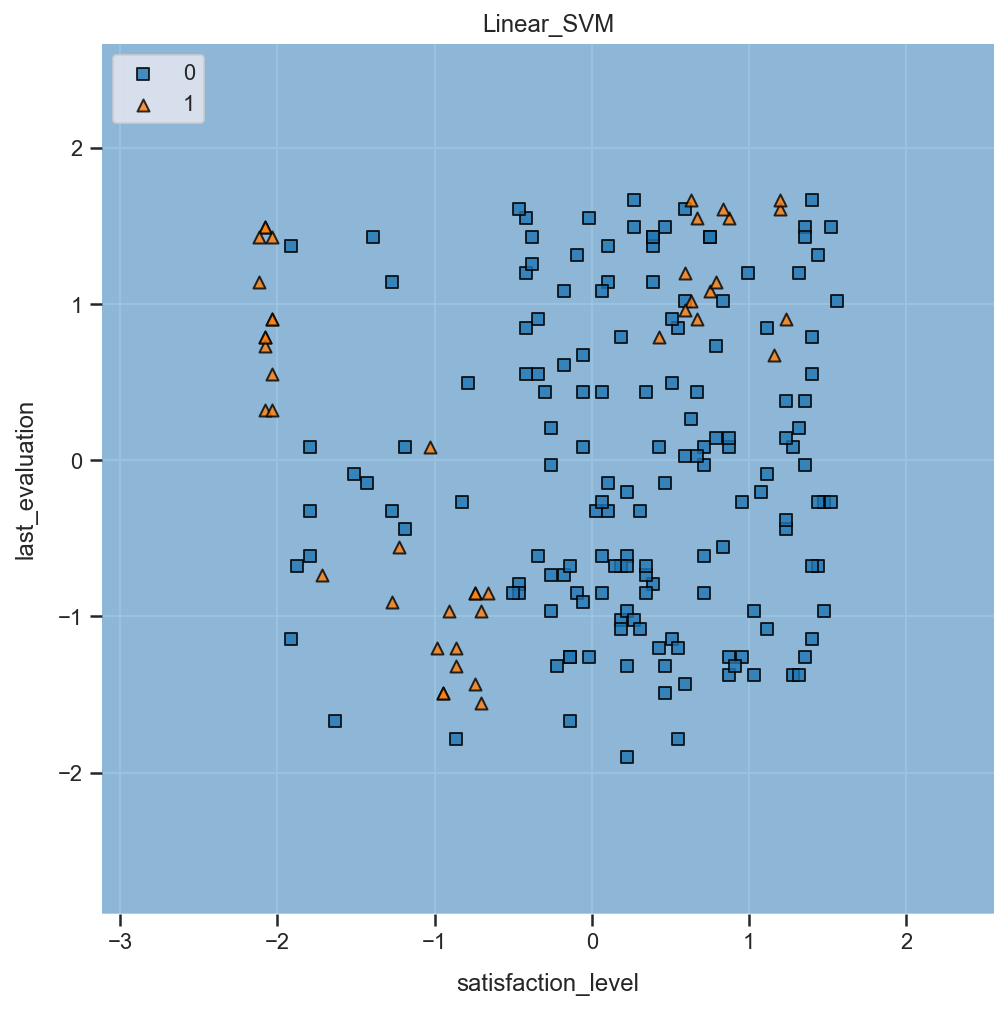

In [10]:
from sklearn.svm import SVC

svm_l = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm_l.fit(X_train_std, y_train)

check_model_fit_and_assemble_score(test_name = 'Linear_SVM', clf = svm_l, X_test = X_test_std, y_test = y_test)

### RBF Support Vector Machine (SVM)

,Model Name,Overall Accuracy Score,Left_0 Score,Left_1 Score
0,Linear_SVM,75.91,100.000000,0.000000
1,RBF_SVM_Scale,89.73,96.838407,67.343173


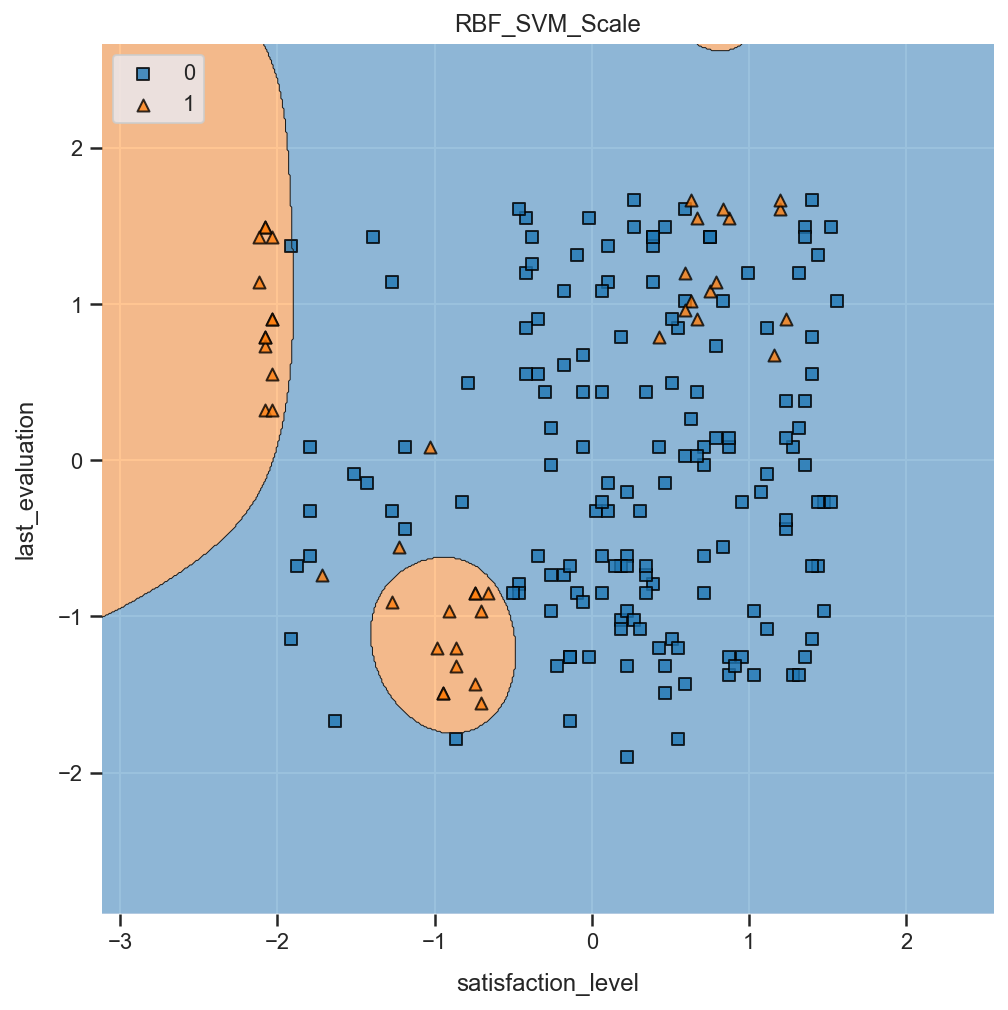

In [11]:
svm_rbf = SVC(kernel='rbf', C=1, random_state=1, gamma='scale')
svm_rbf.fit(X_train_std, y_train)

check_model_fit_and_assemble_score(test_name = 'RBF_SVM_Scale', clf = svm_rbf, X_test = X_test_std, y_test = y_test)

### K-Nearest Neighbours with 3 neighbours

,Model Name,Overall Accuracy Score,Left_0 Score,Left_1 Score
0,Linear_SVM,75.91,100.000000,0.000000
1,RBF_SVM_Scale,89.73,96.838407,67.343173
2,KNN - 3N,90.87,93.764637,81.734317


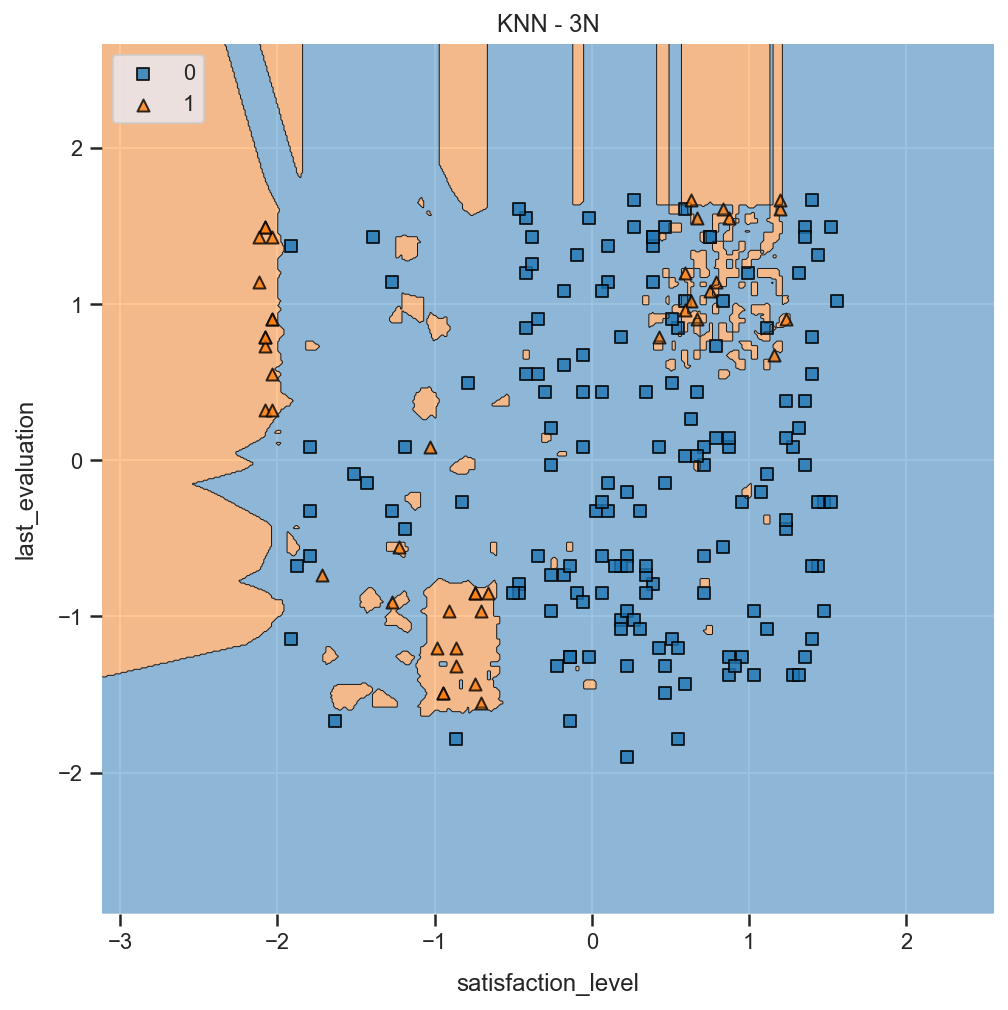

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_std, y_train)

check_model_fit_and_assemble_score(test_name = 'KNN - 3N', clf = knn_3, X_test = X_test_std, y_test = y_test)

### K-Nearest Neighbours with 25 neighbours

,Model Name,Overall Accuracy Score,Left_0 Score,Left_1 Score
0,Linear_SVM,75.91,100.000000,0.000000
1,RBF_SVM_Scale,89.73,96.838407,67.343173
2,KNN - 3N,90.87,93.764637,81.734317
3,KNN - 25N,91.56,96.311475,76.568266


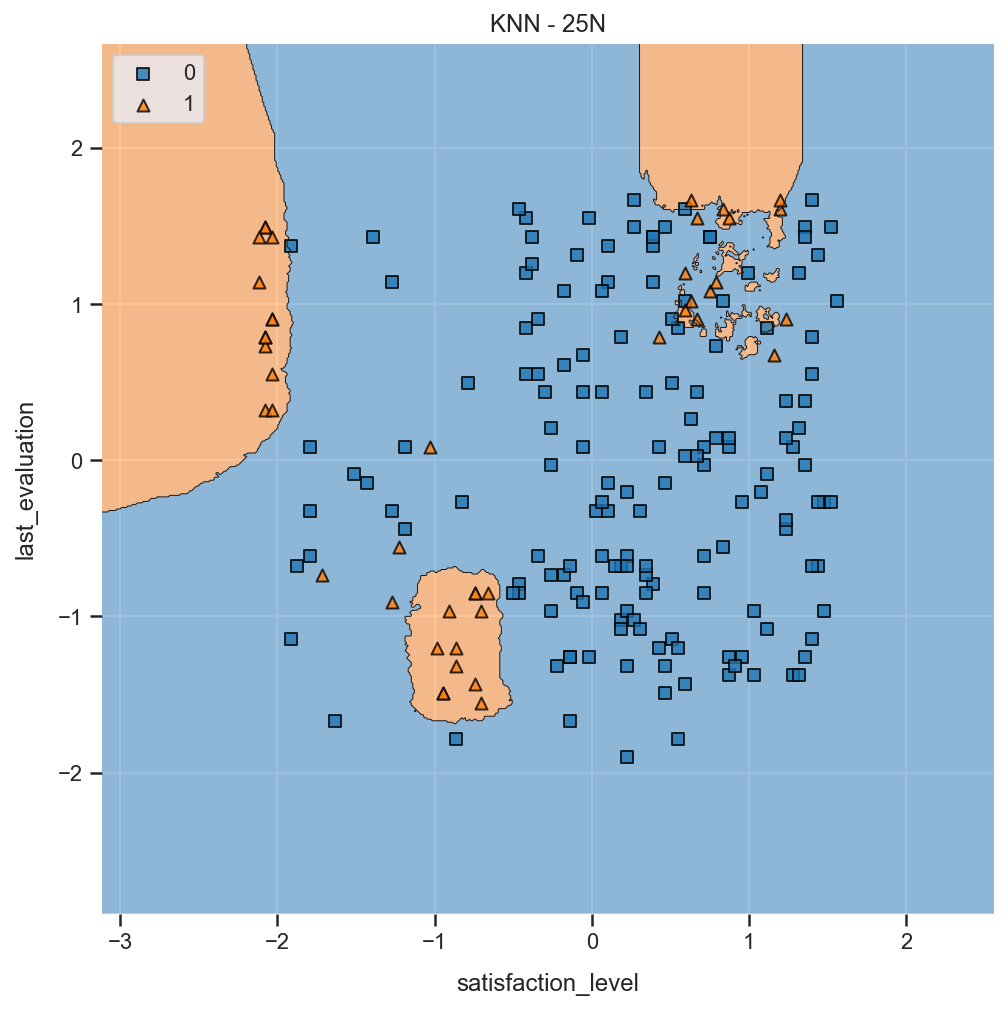

In [13]:
# Increasing the number of "nearest neighbors" to reduce overfitting

knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_25.fit(X_train_std, y_train)

check_model_fit_and_assemble_score(test_name = 'KNN - 25N', clf = knn_25, X_test = X_test_std, y_test = y_test)

### Random Forest

,Model Name,Overall Accuracy Score,Left_0 Score,Left_1 Score
0,Linear_SVM,75.91,100.000000,0.000000
1,RBF_SVM_Scale,89.73,96.838407,67.343173
2,KNN - 3N,90.87,93.764637,81.734317
3,KNN - 25N,91.56,96.311475,76.568266
4,Random Forest,71.80,84.806792,30.811808


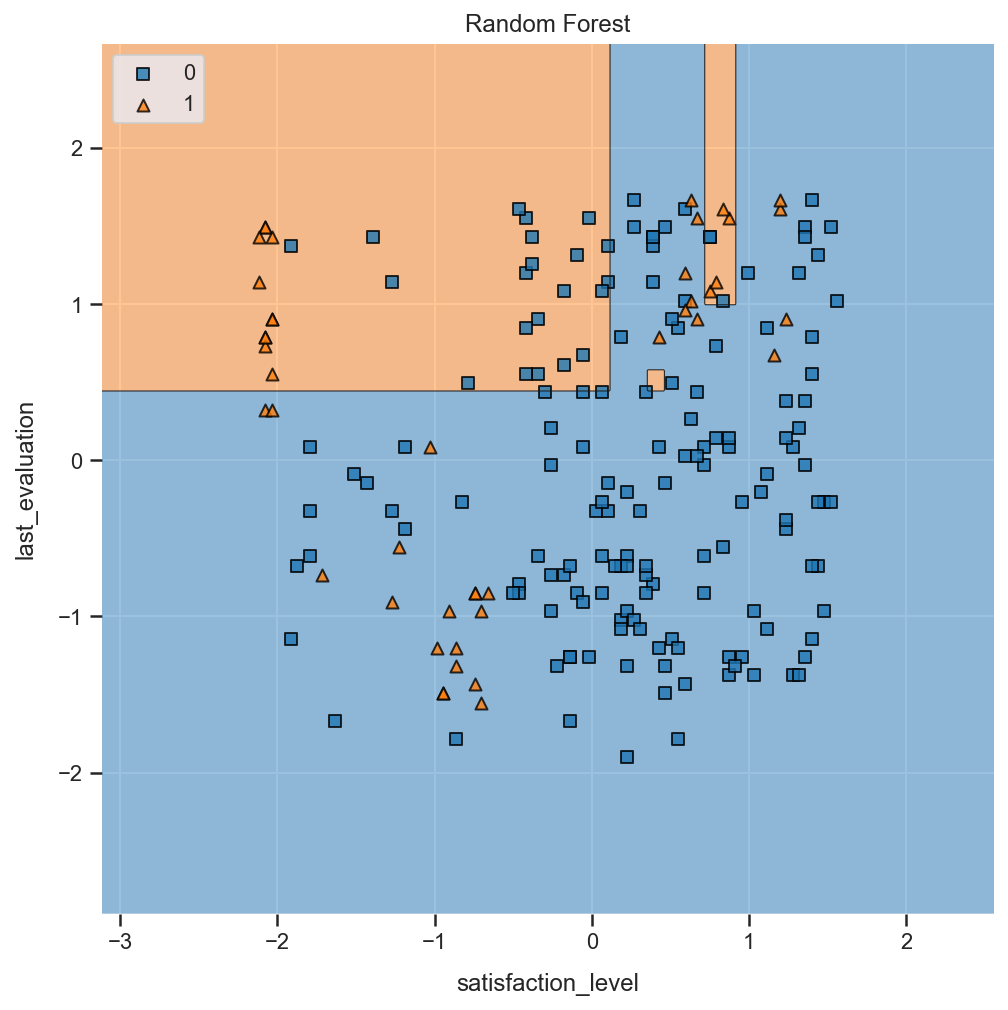

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=1)
forest.fit(X_train, y_train)

check_model_fit_and_assemble_score(test_name = 'Random Forest', clf = forest, X_test = X_test_std, y_test = y_test)